In [1]:
import pandas as pd
import dateparser
import datetime as datetime
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from textblob import TextBlob
from bs4 import BeautifulSoup

In [2]:
df_yt = pd.read_csv('df_yt.csv')
df_yt_scraped2 = pd.read_csv('df_yt_scraped2.csv')
df_yt_scraped3 = pd.read_csv('df_yt_scraped3.csv')
df_yt_scraped4 = pd.read_csv('df_yt_scraped4.csv')
df_yt_scraped5 = pd.read_csv('df_yt_scraped5.csv')
df_yt_scraped6 = pd.read_csv('df_yt_scraped6.csv')
df_yt_scraped7 = pd.read_csv('df_yt_scraped7.csv')
df_yt_scraped8 = pd.read_csv('df_yt_scraped8.csv')
df_yt_scraped9 = pd.read_csv('df_yt_scraped9.csv')
df_yt_scraped10 = pd.read_csv('df_yt_scraped10.csv')
df_yt_scraped11 = pd.read_csv('df_yt_scraped11.csv')
df_yt_scraped12 = pd.read_csv('df_yt_scraped12.csv')


In [3]:
df_comments = pd.concat([df_yt_scraped2, df_yt_scraped3, df_yt_scraped4, df_yt_scraped5, df_yt_scraped7, df_yt_scraped7, df_yt_scraped8, df_yt_scraped9, df_yt_scraped10, df_yt_scraped11, df_yt_scraped12], ignore_index=True)

In [81]:
df_yt_videos = pd.read_csv('./cleaned/df_yt_videos.csv')

In [86]:
df_comments

,Unnamed: 0,Username,Comment,Likes,Replies,Date,link
0,0,@michaelporter-lo9qc,i have a very hard life . im sick and im lost ...,383,100,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
1,1,@walterf6993,I truly believe people are being saved by your...,76,4,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
2,2,@gretchen9716,I love your discernment of these times! Your t...,31,1,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
3,3,@melissalarson2569,A couple years ago I couldn't see how the end ...,44,15,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
4,4,@joenorthpeigan3197,Praise the Lord. And Thank you pastor John. T...,19,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
...,...,...,...,...,...,...,...
87099,5449,Ever4U,I I'll go to Mall to watch items,0,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic
87100,5450,Muneer Hasan,Do lpu really have such kind of teachers...?,0,1,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic
87101,5451,Soumyaranjan Mendili,Hii sri,0,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic
87102,5452,Yuta Itadori,Bakbakbak,0,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic


In [82]:
df_comments

,Unnamed: 0,Username,Comment,Likes,Replies,Date,link
0,0,@michaelporter-lo9qc,i have a very hard life . im sick and im lost ...,383,100,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
1,1,@walterf6993,I truly believe people are being saved by your...,76,4,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
2,2,@gretchen9716,I love your discernment of these times! Your t...,31,1,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
3,3,@melissalarson2569,A couple years ago I couldn't see how the end ...,44,15,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
4,4,@joenorthpeigan3197,Praise the Lord. And Thank you pastor John. T...,19,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
...,...,...,...,...,...,...,...
87099,5449,Ever4U,I I'll go to Mall to watch items,0,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic
87100,5450,Muneer Hasan,Do lpu really have such kind of teachers...?,0,1,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic
87101,5451,Soumyaranjan Mendili,Hii sri,0,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic
87102,5452,Yuta Itadori,Bakbakbak,0,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic


In [ ]:
df_comments = pd.concat([df_yt_scraped2, df_yt_scraped3, df_yt_scraped4, df_yt_scraped5, df_yt_scraped6, df_yt_scraped7, df_yt_scraped8, df_yt_scraped9, df_yt_scraped10], ignore_index=True)

In [83]:
def cleaning_youtube_videos(df):
    # Initialize SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    try:
        df = df[df['date'] != 'Unknown'].reset_index(drop=True)
    except:
        pass

    if df['date'].notnull().all():
        df['date'] = df['date'].astype(str)

    # apply the dateparser.parse() function to the "date" column and format the dates
    df['date'] = df['date'].apply(lambda x: dateparser.parse(x).strftime('%d-%m-%Y'))

    # Calculate Name sentiment and Description sentiment
    df['Name sentiment'] = df['Name'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['Description sentiment'] = df['description'].apply(lambda x: sia.polarity_scores(x)['compound'])
    
    # Calculate Name subjectivity and Description subjectivity
    df['Name subjectivity'] = df['Name'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    df['Description subjectivity'] = df['description'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    
    # Drop 'Unnamed: 0' column
    df = df.drop('Unnamed: 0', axis=1)
    
    # Rename columns
    df = df.rename(columns={'views': 'Views', 
                            'duration': 'Duration', 
                            'date': 'Date', 
                            'description': 'Description', 
                            'link': 'Link',
                            'Name': 'Title',
                            'Name subjectivity':'Title subjectivity',
                            'Name sentiment':'Title sentiment'})
    
    # Reorder columns
    df = df.reindex(columns=['Title', 
                             'Title sentiment', 
                             'Title subjectivity', 
                             'Views', 
                             'Duration', 
                             'Date', 
                             'Description', 
                             'Description sentiment', 
                             'Description subjectivity', 
                             'Link'])
    
    return df

def cleaning_youtube_comments(df):
    # Initialize SentimentIntensityAnalyzer
    
    try: 
        df.drop("Unnamed: 0", axis=1, inplace=True)
    except:
        pass
    sia = SentimentIntensityAnalyzer()
    df.drop_duplicates(inplace=True)
    df['Date'] = df['Date'].apply(lambda x: BeautifulSoup(x, 'html.parser').text)

    df = df[df['Date'] != 'Unknown'].reset_index(drop=True)
    df['Comment'] = df['Comment'].astype(str)

    if df['Date'].notnull().all():
        df['Date'] = df['Date'].astype(str)

    # apply the dateparser.parse() function to the "date" column and format the dates
    df['Date'] = df['Date'].apply(lambda x: dateparser.parse(x).strftime('%d-%m-%Y') if dateparser.parse(x) is not None else None)

    # Calculate Name sentiment and Description sentiment
    df['Comment sentiment'] = df['Comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

    # Calculate Name subjectivity and Description subjectivity
    df['Comment subjectivity'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
     
    # Rename columns
    df = df.rename(columns={'link': 'Link'})

    # Reorder columns
    df = df.reindex(columns=['Username', 
                             'Comment', 
                             'Comment sentiment', 
                             'Comment subjectivity', 
                             'Date',
                             'Likes', 
                             'Replies', 
                             'Link'])
    
    return df



In [6]:
import pandas as pd
import dateparser
from datetime import datetime, timedelta
from textblob import TextBlob
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def cleaning_youtube_comments(df):
    # Initialize SentimentIntensityAnalyzer
    try: 
        df.drop("Unnamed: 0", axis=1, inplace=True)
    except:
        pass
    sia = SentimentIntensityAnalyzer()
    df.drop_duplicates(inplace=True)
    df['Date'] = df['Date'].apply(lambda x: BeautifulSoup(x, 'html.parser').text if x is not None else None)
    df = df[df['Date'] != 'nan'].reset_index(drop=True)
    df = df[df['Date'] != 'Unknown'].reset_index(drop=True)
    df['Comment'] = df['Comment'].fillna('')
    if df['Date'].notnull().all():
        df['Date'] = df['Date'].astype(str)

    # Replace "weeks ago" dates with actual dates
    for i, row in df.iterrows():
        if "week" in row['Date']:
            num_weeks_ago = int(row['Date'].split()[0])
            date = datetime.now() - timedelta(weeks=num_weeks_ago)
            df.at[i, 'Date'] = date.strftime('%d-%m-%Y')

    # apply the dateparser.parse() function to the "date" column and format the dates
    df['Date'] = df['Date'].apply(lambda x: dateparser.parse(x).strftime('%d-%m-%Y') if pd.notnull(x) and dateparser.parse(x) is not None else None)
    df['Date'] = df['Date'].astype(str)
    
    # Calculate Name sentiment and Description sentiment
    df['Comment sentiment'] = df['Comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

    # Calculate Name subjectivity and Description subjectivity
    df['Comment subjectivity'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
     
    # Rename columns
    df = df.rename(columns={'link': 'Link'})

    # Reorder columns
    df = df.reindex(columns=['Username', 
                             'Comment', 
                             'Comment sentiment', 
                             'Comment subjectivity', 
                             'Date',
                             'Likes', 
                             'Replies', 
                             'Link'])
    
    return df


In [8]:
df_comments

,Username,Comment,Comment sentiment,Comment subjectivity,Date,Likes,Replies,Link
0,@michaelporter-lo9qc,i have a very hard life . im sick and im lost ...,-0.6232,0.765327,24-02-2023,383,100,https://www.youtube.com/watch?v=oz2n-rQCWzI
1,@walterf6993,I truly believe people are being saved by your...,0.9661,0.609762,24-02-2023,76,4,https://www.youtube.com/watch?v=oz2n-rQCWzI
2,@gretchen9716,I love your discernment of these times! Your t...,0.9501,0.550909,24-02-2023,31,1,https://www.youtube.com/watch?v=oz2n-rQCWzI
3,@melissalarson2569,A couple years ago I couldn't see how the end ...,0.9628,0.950000,24-02-2023,44,15,https://www.youtube.com/watch?v=oz2n-rQCWzI
4,@joenorthpeigan3197,Praise the Lord. And Thank you pastor John. T...,0.9719,0.566667,24-02-2023,19,0,https://www.youtube.com/watch?v=oz2n-rQCWzI
...,...,...,...,...,...,...,...,...
71024,Ever4U,I I'll go to Mall to watch items,0.0000,0.000000,17-03-2021,0,0,https://www.youtube.com/watch?v=6490tKrGEic
71025,Muneer Hasan,Do lpu really have such kind of teachers...?,0.0000,0.533333,17-03-2021,0,1,https://www.youtube.com/watch?v=6490tKrGEic
71026,Soumyaranjan Mendili,Hii sri,0.0000,0.000000,17-03-2022,0,0,https://www.youtube.com/watch?v=6490tKrGEic
71027,Yuta Itadori,Bakbakbak,0.0000,0.000000,17-03-2021,0,0,https://www.youtube.com/watch?v=6490tKrGEic


In [7]:
df_comments = cleaning_youtube_comments(df_comments)

In [8]:
df_yt = cleaning_youtube_videos(df_yt)

In [9]:
df_yt.to_csv('./cleaned/df_yt_videos', index=False)

In [50]:
print(df_yt_comments_mini.loc[1, 'Comment'])

I truly believe people are being saved by your ministries and teaching.  Thank the Lord.  It's so simple and obvious a child could understand it.  Not flowery speech or hard pressure salesmanship.

"1 And when I came to you, brothers and sisters, I did not come as someone superior in speaking ability or wisdom, as I proclaimed to you the testimony of God. 2 For I determined to know nothing among you except Jesus Christ, and Him crucified. 3 I also was with you in weakness and fear, and in great trembling, 4 and my message and my preaching were not in persuasive words of wisdom, but in demonstration of the Spirit and of power, 5 so that your faith would not rest on the wisdom of mankind, but on the power of God."  I Corinthians 2


In [84]:
df_comments

,Unnamed: 0,Username,Comment,Likes,Replies,Date,link
0,0,@michaelporter-lo9qc,i have a very hard life . im sick and im lost ...,383,100,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
1,1,@walterf6993,I truly believe people are being saved by your...,76,4,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
2,2,@gretchen9716,I love your discernment of these times! Your t...,31,1,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
3,3,@melissalarson2569,A couple years ago I couldn't see how the end ...,44,15,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
4,4,@joenorthpeigan3197,Praise the Lord. And Thank you pastor John. T...,19,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=oz2n-rQCWzI
...,...,...,...,...,...,...,...
87099,5449,Ever4U,I I'll go to Mall to watch items,0,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic
87100,5450,Muneer Hasan,Do lpu really have such kind of teachers...?,0,1,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic
87101,5451,Soumyaranjan Mendili,Hii sri,0,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic
87102,5452,Yuta Itadori,Bakbakbak,0,0,"<a class=""yt-simple-endpoint style-scope yt-fo...",https://www.youtube.com/watch?v=6490tKrGEic


In [94]:
df_yt_comments = cleaning_youtube_comments(df_yt_comments)

KeyError: 'Comment'

In [91]:
from bs4 import BeautifulSoup
from dateutil import parser as dateparser
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

def cleaning_youtube_comments(df):
    # Initialize SentimentIntensityAnalyzer
    
    try: 
        df.drop("Unnamed: 0", axis=1, inplace=True)
    except:
        pass
    sia = SentimentIntensityAnalyzer()
    df.drop_duplicates(inplace=True)
    
    # Convert any float values in 'Date' column to string
    df['Date'] = df['Date'].apply(lambda x: str(x) if isinstance(x, float) else x)
    
    df['Date'] = df['Date'].apply(lambda x: BeautifulSoup(x, 'html.parser').text if x is not None else None)

    df = df[df['Date'] != 'Unknown'].reset_index(drop=True)

    if df['Date'].notnull().all():
        df['Date'] = df['Date'].astype(str)

    # apply the dateparser.parse() function to the "date" column and format the dates
    df['Date'] = df['Date'].apply(lambda x: dateparser.parse(x).strftime('%d-%m-%Y') if x is not None and dateparser.parse(x) is not None else None)
    df['Date'] = df['Date'].astype(str)
    # Calculate Name sentiment and Description sentiment
    df['Comment sentiment'] = df['Comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

    # Calculate Name subjectivity and Description subjectivity
    df['Comment subjectivity'] = df['Comment'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
     
    # Rename columns
    df = df.rename(columns={'link': 'Link'})

    # Reorder columns
    df = df.reindex(columns=['Username', 
                             'Comment', 
                             'Comment sentiment', 
                             'Comment subjectivity', 
                             'Date',
                             'Likes', 
                             'Replies', 
                             'Link'])
    
    return df


In [48]:
df_yt_comments_minii[1]

KeyError: 1

In [58]:
df_yt_comments_minii = df_yt_comments_minii.drop(columns="Comment")

In [59]:
df_yt_comments_minii.to_csv('./cleaned/df_yt_comments_mini.csv', index=False)

In [28]:
df_yt_comments['Date'].type()

AttributeError: 'Series' object has no attribute 'type'

In [34]:
df_yt_comments = cleaning_youtube_comments(df_comments)

In [61]:
df_yt_2 = df_yt_2.drop(columns="Comment")


In [62]:
df_yt_2

,Username,Comment sentiment,Comment subjectivity,Date,Likes,Replies,Link
0,@michaelporter-lo9qc,-0.6232,0.765327,23-02-2023,383,100,https://www.youtube.com/watch?v=oz2n-rQCWzI
1,@walterf6993,0.9661,0.609762,23-02-2023,76,4,https://www.youtube.com/watch?v=oz2n-rQCWzI
2,@gretchen9716,0.9501,0.550909,23-02-2023,31,1,https://www.youtube.com/watch?v=oz2n-rQCWzI
3,@melissalarson2569,0.9628,0.950000,23-02-2023,44,15,https://www.youtube.com/watch?v=oz2n-rQCWzI
4,@joenorthpeigan3197,0.9719,0.566667,23-02-2023,19,0,https://www.youtube.com/watch?v=oz2n-rQCWzI
...,...,...,...,...,...,...,...
38277,Ever4U,0.0000,0.000000,16-03-2021,0,0,https://www.youtube.com/watch?v=6490tKrGEic
38278,Muneer Hasan,0.0000,0.533333,16-03-2021,0,1,https://www.youtube.com/watch?v=6490tKrGEic
38279,Soumyaranjan Mendili,0.0000,0.000000,16-03-2022,0,0,https://www.youtube.com/watch?v=6490tKrGEic
38280,Yuta Itadori,0.0000,0.000000,16-03-2021,0,0,https://www.youtube.com/watch?v=6490tKrGEic


In [64]:
df_yt_2.to_csv('./cleaned/df_yt_comments2.csv', index=False)

In [9]:
df_comments

,Username,Comment,Comment sentiment,Comment subjectivity,Date,Likes,Replies,Link
0,@michaelporter-lo9qc,i have a very hard life . im sick and im lost ...,-0.6232,0.765327,24-02-2023,383,100,https://www.youtube.com/watch?v=oz2n-rQCWzI
1,@walterf6993,I truly believe people are being saved by your...,0.9661,0.609762,24-02-2023,76,4,https://www.youtube.com/watch?v=oz2n-rQCWzI
2,@gretchen9716,I love your discernment of these times! Your t...,0.9501,0.550909,24-02-2023,31,1,https://www.youtube.com/watch?v=oz2n-rQCWzI
3,@melissalarson2569,A couple years ago I couldn't see how the end ...,0.9628,0.950000,24-02-2023,44,15,https://www.youtube.com/watch?v=oz2n-rQCWzI
4,@joenorthpeigan3197,Praise the Lord. And Thank you pastor John. T...,0.9719,0.566667,24-02-2023,19,0,https://www.youtube.com/watch?v=oz2n-rQCWzI
...,...,...,...,...,...,...,...,...
71024,Ever4U,I I'll go to Mall to watch items,0.0000,0.000000,17-03-2021,0,0,https://www.youtube.com/watch?v=6490tKrGEic
71025,Muneer Hasan,Do lpu really have such kind of teachers...?,0.0000,0.533333,17-03-2021,0,1,https://www.youtube.com/watch?v=6490tKrGEic
71026,Soumyaranjan Mendili,Hii sri,0.0000,0.000000,17-03-2022,0,0,https://www.youtube.com/watch?v=6490tKrGEic
71027,Yuta Itadori,Bakbakbak,0.0000,0.000000,17-03-2021,0,0,https://www.youtube.com/watch?v=6490tKrGEic


In [11]:
df_comments.to_csv('./cleaned/df_yt_comments.csv', index=False)

In [3]:
import pandas as pd

df_comments = pd.read_csv("./cleaned/df_yt_comments.csv")



In [4]:
import stylecloud
from IPython.display import Image

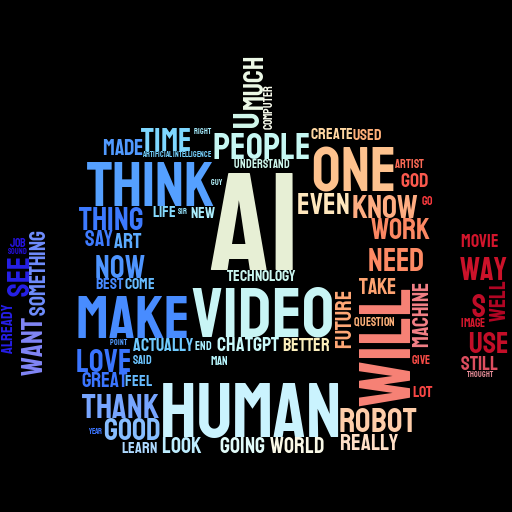

In [5]:
stylecloud.gen_stylecloud(text=df_comments["Comment"].str.cat(sep=' '),
                          icon_name='fas fa-robot',
                          max_words = 75,
                          palette='lightbartlein.diverging.BlueDarkRed18_8',
                          background_color='black',
                          gradient='horizontal')
Image(filename='stylecloud.png')    

In [76]:

# Load the two dataframes
df_yt_videos = pd.read_csv('./cleaned/df_yt_videos.csv')
df_yt_comments = pd.read_csv('./cleaned/df_yt_comments2.csv')

# Count the occurrence of every link in df_yt_comments
link_count = df_yt_comments['Link'].value_counts()

# Add the 'Comments' column to df_yt_videos
df_yt_videos['Comments'] = df_yt_videos['Link'].map(link_count)

# Save the updated dataframe to a new CSV file
df_yt_videos.to_csv('./cleaned/df_yt_videos_with_comments.csv', index=False)


In [77]:
df_yt_videos

,Title,Title sentiment,Title subjectivity,Views,Duration,Date,Description,Description sentiment,Description subjectivity,Link,Comments
0,What Is Artificial Intelligence? | 🔥Artificial...,0.7351,1.000000,"1,166,565","5 minutes, 28 seconds",16-03-2020,"This video on ""What is Artificial Intelligence...",0.7003,1.000000,https://www.youtube.com/watch?v=ad79nYk2keg,997.0
1,How will AI change the world?,0.0000,0.000000,"730,358","5 minutes, 56 seconds",16-12-2022,Explore the current limitations of artificial ...,0.6486,0.700000,https://www.youtube.com/watch?v=RzkD_rTEBYs,788.0
2,Artificial Intelligence: Last Week Tonight wit...,0.4767,0.533333,"5,225,357",Unknown,05-03-2023,Artificial intelligence is increasingly becomi...,0.4767,0.925000,https://www.youtube.com/watch?v=Sqa8Zo2XWc4,NaN
3,"Midweek Marvels: Pete Buttigieg, Marianne Will...",0.7269,0.750000,"16,533",Unknown,15-03-2023,For entertainment purposes only. Just one guy'...,0.5859,0.845238,https://www.youtube.com/watch?v=H_xReIQ8DLo,NaN
4,The Danger of AI | Scary Technology | Artifici...,-0.5423,0.666667,"75,913",Unknown,02-03-2023,The Danger of AI - An examination of an altern...,-0.0772,0.577778,https://www.youtube.com/watch?v=5guiUrgcblM,NaN
...,...,...,...,...,...,...,...,...,...,...,...
530,WHAT ARTIFICIAL INTELLIGENCE IS CAPABLE OF? | ...,0.8316,0.631250,unknown,"1 minute, 59 seconds",15-03-2023,Are you curious about the incredible potential...,0.7506,0.900000,https://www.youtube.com/watch?v=gr5hCs-QRjs,NaN
531,Artificial Intelligence: What does the future ...,0.7382,0.441667,20,Unknown,14-03-2023,"In the early twenty-first century, no place ha...",-0.2960,0.400000,https://www.youtube.com/watch?v=rP8KYbRuQmQ,NaN
532,Paragraph Writing from hints || 10th writing s...,0.4767,1.000000,64,"12 minutes, 55 seconds",16-03-2023,Paragraph Writing from hints || 10th writing s...,0.7213,0.625000,https://www.youtube.com/watch?v=e8MY1yvqySo,NaN
533,Artificial Intelligence 10 Risks You Should Kn...,0.2500,1.000000,unknown,"4 minutes, 58 seconds",15-03-2023,Artificial intelligence (AI) has the potential...,0.4767,0.738636,https://www.youtube.com/watch?v=CZV9mDbG7v0,NaN
